<a href="https://colab.research.google.com/github/Chanpitou/Housing_Price_Prediction/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titile and Introduction**

## Housing Price Prediction

---



## Introduction

The goal of this project is build an accurate model to predict house prices using a dataset containing 13 different attributes.

The primary objectives of this project are to:

1. **Understand the dataset**: Perform exploratory data analysis (EDA) to uncover patterns and relationships within the data.
2. **Preprocess the data**: Handle missing values, encode categorical variables, and scale numerical features to prepare the data for modeling.
3. **Build and evaluate models**: Implement and evaluate different machine learning algorithms to find the best-performing model for our dataset.
4. **Optimize the model**: Tune hyperparameters to improve the model's performance and reliability.
5. **Make predictions**: Use the final model to predict housing prices on new, unseen data.











# Data Preprocessing and Exploration

## Data Source

For this project, we are using a dataset from Kaggle. This dataset has 13 different attributes comprehensive information for house price predictio. The 13 Columns name are:

1.   Price: The price of the house.
2.   Area: The total area of the house in square feet.
3.   Bedrooms: The number of bedrooms in the house.
4.   Bathrooms: The number of bathrooms in the house.
5.   Stories: The number of stories in the house.
6.   Mainroad: Whether the house is connected to the main road (Yes/No).
7.   Guestroom: Whether the house has a guest room (Yes/No).
8.   Basement: Whether the house has a basement (Yes/No).
9.   Hot water heating: Whether the house has a hot water heating system (Yes/No).
10.   Airconditioning: Whether the house has an air conditioning system (Yes/No).
11.   Parking: The number of parking spaces available within the house.
12.   Prefarea: Whether the house is located in a preferred area (Yes/No).
13.   Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

Dataset Link: [https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction?select=Housing.csv](https://)

## Loading Data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
data = pd.read_csv("Housing.csv")
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


## Data Cleaning and Transformation

### Handing Missing Value


In [86]:
# check for missing values
data.info()

# Fortunately there is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Encoding Categorical Variables

In [87]:
# transforming "yes/no" columns to binary columns
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_columns:
    data[col] = data[col].replace({'yes': 1, 'no': 0})

# one-hot encoding the "furnishingstatus" column, then drop the "furnishingstatus" column
data = data.join(pd.get_dummies(data.furnishingstatus)).drop(["furnishingstatus"], axis=1)

In [88]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,False,True,False
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,False,True,False
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,False,False,True
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,True,False,False
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,False,False,True


## Exploratory Data Analysis (EDA)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>],
       [<Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>],
       [<Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>]], dtype=object)

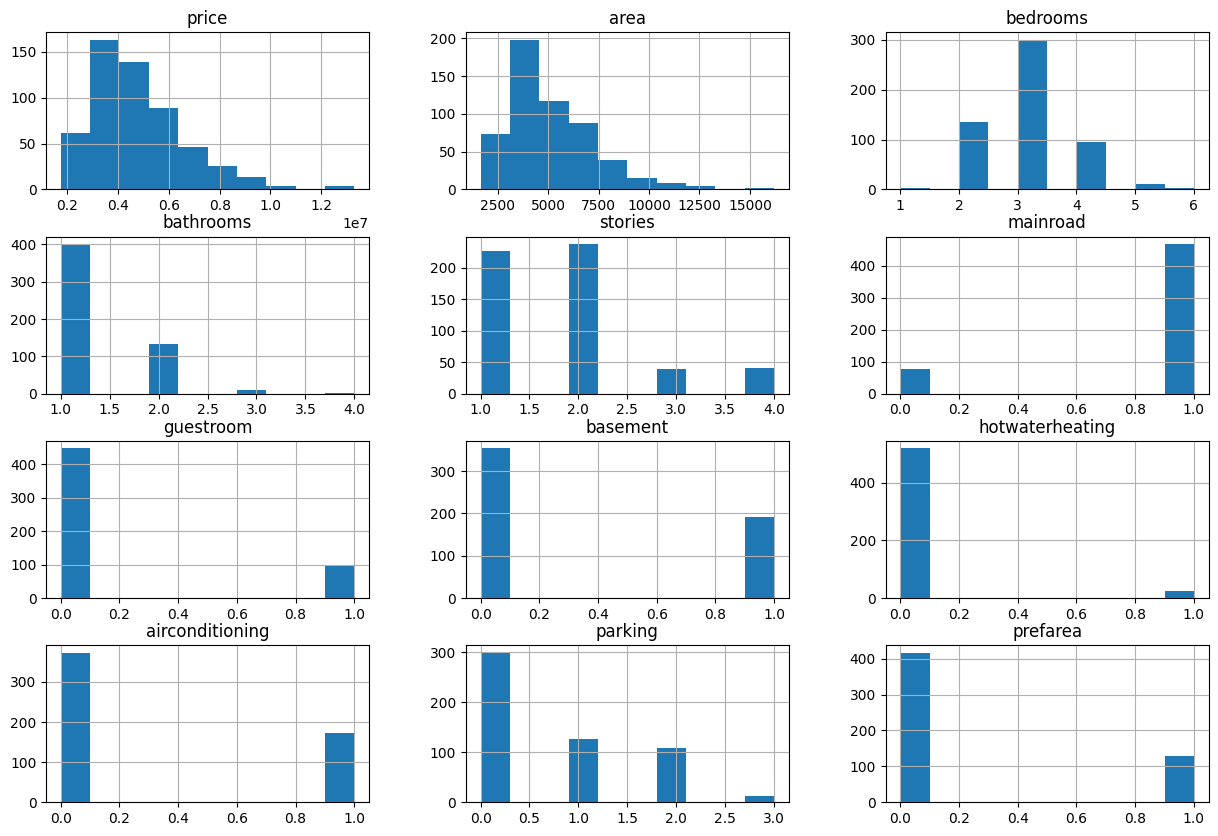

In [89]:
data.hist(figsize=(15, 10))

<Axes: >

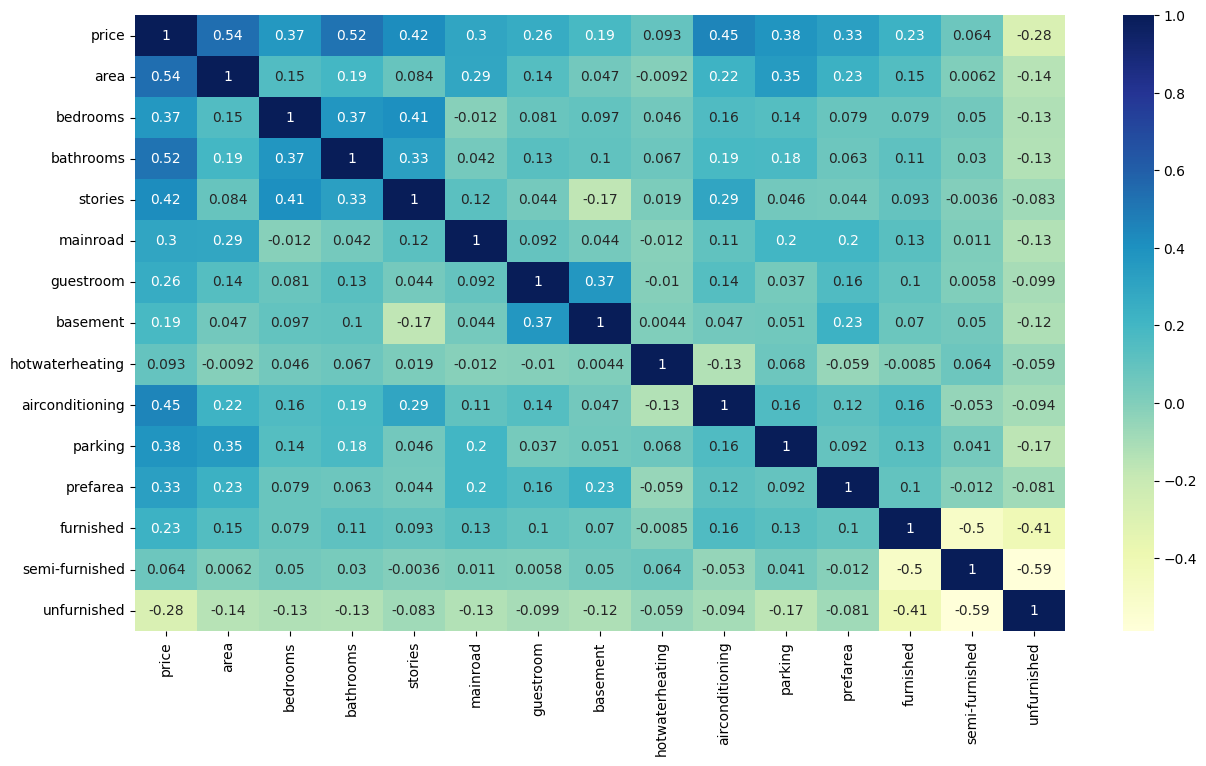

In [107]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


# Models Building

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = data.drop(["price"], axis=1)
X_s = scaler.fit_transform(X)
y = data["price"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2) # Spliting the dataset into 80/20.

## LinearRegression Model

In [92]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# train the model
reg.fit(X_train, y_train)

LinearRegression()

In [93]:
# test the model
reg.score(X_test, y_test)

0.6704696605640821

## RandomForest Model

In [94]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

# fit the model
forest.fit(X_train, y_train)

RandomForestRegressor()

In [96]:
# test the model
forest.score(X_test, y_test)

0.6205972607981944

In [114]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

# optimize the randomforest model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [115]:
best_forest = grid_search.best_estimator_

In [116]:
best_forest.score(X_test, y_test)

0.6336797737004013

# Conclusion

In this project, we developed two distinct models to predict housing prices: one utilizing linear regression and the other employing a random forest algorithm. Through rigorous experimentation and evaluation, we discovered that the linear regression model outperformed the random forest model in terms of predictive accuracy.

# Key Findings

Upon evaluating the performance metrics of both models, it became evident that the linear regression model consistently yielded superior results compared to the random forest model. This finding underscores the effectiveness of linear regression in capturing the underlying patterns within the data and making accurate predictions.

# Challenges and Insights

Throughout the project, we encountered challenges related to data preprocessing, feature selection, and model optimization. However, these challenges provided valuable insights into the intricacies of regression modeling and the importance of meticulous data preparation in achieving optimal results

# Future Directions

While the linear regression model emerged as the preferred choice in this project, there are still opportunities for further exploration and improvement. Future projects could involve experimenting with different algorithms, refining feature engineering techniques, and exploring ensemble methods to enhance predictive performance even further.